Saved stopwords and found out the frequency of mails recieved in this folder

In [51]:
import os
from email.parser import Parser
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import csv
import datetime
import dateutil.parser as parser
import matplotlib.pyplot as plt

In [52]:
rootdir=r"C:\Users\ishac\enron_mail_20150507\skilling-j\inbox\genie"

In [64]:

def email_analyse(inputfile, to_email_list, from_email_list, email_body,email_date):
    with open(inputfile, "r") as f:
        data = f.read()
        email = Parser().parsestr(data) 
    if email['to']:
        email_to = email['to']
        email_to = email_to.replace("\n", "")
        email_to = email_to.replace("\t", "")
        email_to = email_to.replace(" ", "")

        email_to = email_to.split(",")

        for email_to_1 in email_to:
            to_email_list.append(email_to_1)

    from_email_list.append(email['from'])

    email_body.append(email.get_payload())
    email_date.append(email['date'])

In [65]:
to_email_list=[]
from_email_list=[]
email_body=[]
email_date=[]
for directory, subdirectory, filenames in  os.walk(rootdir):
    for filename in filenames:
        email_analyse(os.path.join(directory, filename), to_email_list, from_email_list, email_body,email_date)

In [66]:
for i in range(len(email_body)):
    words= word_tokenize(email_body[i])
    #print(words)

In [67]:
useful_words=[]
useful_words=[word  for word in words if word not in stopwords.words('English')]
#print(useful_words)

In [78]:

with open('DetailMailLog.csv','w') as csvfile:
    writer = csv.writer(csvfile)  
    writer.writerow(to_email_list)
    writer.writerow(from_email_list) 
    writer.writerow(email_date)
        

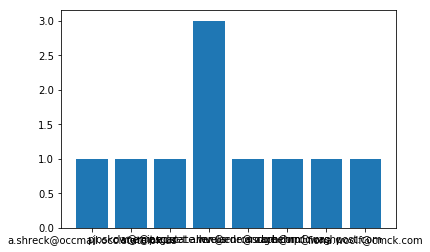

In [77]:
plt.bar(range(len(di)), di.values(), align='center')
plt.xticks(range(len(di)), list(di.keys()))
plt.show()


In [72]:
f = open('Analysis.txt','w',encoding='utf-8') 
f.write('DATA\n')
for item in useful_words:
        f.write("%s\n" %item)
    